In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/ico.csv", encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


- Tạo cột Revenue

In [4]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# Thống kê mô tả

- Doanh thu thấp nhất trên 1 hoá đơn

In [5]:
df["Revenue"].min()

-168469.6

In [6]:
df["Revenue"].max()

168469.6

In [7]:
df["Revenue"].median()

9.75

- Kiểm tra xem kết quả âm do đâu

In [8]:
# Lọc ra những dòng có revenue <0
df.loc[df["Revenue"] < 0 , :].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96


- Nguyên nhân: quantity có thể âm
    - Quantity < 0: công ty nhập hàng vào
    - Quantity > 0: công ty bán hàng ra

- Do vậy cần lọc ra những hoá đơn liên quan đến BÁN HÀNG

In [9]:
df_sell = df.loc[df["Quantity"] > 0, :].copy()
df_sell.shape

(531285, 9)

In [10]:
df.shape

(541909, 9)

- Tính lại giá trị hoá đơn nhỏ nhất

In [11]:
df_sell["Revenue"].min()

-11062.06

In [12]:
df_sell.loc[df_sell["Revenue"] == 0, :].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom,0.0


In [13]:
df_sell["Revenue"].mean()

20.035499635796278

In [14]:
df_sell["Revenue"].median()

9.9

## Group by and aggregation
- Thường gộp các cột với giá trị 

### A) Load

In [15]:
# Tip data from seaborn
df = sns.load_dataset("tips")

### B) Inspect

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### C)

In [18]:
# Mean bill by sex
df.groupby("sex")["total_bill"].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [19]:
df.groupby("sex")["total_bill"].min()

sex
Male      7.25
Female    3.07
Name: total_bill, dtype: float64

In [20]:
# Save the aggregation to result
result = df.groupby("sex")["total_bill"].median()

In [21]:
result

sex
Male      18.35
Female    16.40
Name: total_bill, dtype: float64

In [22]:
type(result)

pandas.core.series.Series

In [23]:
result["Male"]

18.35

- More than 1 summary statistics (dùng `.agg`)

In [24]:
# mean and median bill by sex
df.groupby("sex")["total_bill"].agg(["min","mean", "median", "sum", "max", "std"])

,min,mean,median,sum,max,std
sex,,,,,,
Male,7.25,20.744076,18.35,3256.82,50.81,9.246469
Female,3.07,18.056897,16.40,1570.95,44.30,8.009209


In [25]:
df.groupby("sex")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,20.744076,9.246469,7.25,14.00,18.35,24.71,50.81
Female,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.30


<AxesSubplot:>

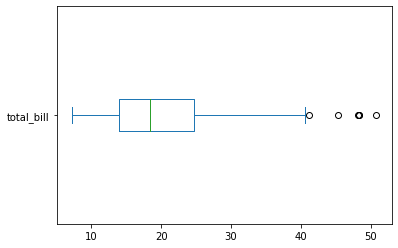

In [26]:
df.loc[df["sex"]== "Male", "total_bill"].plot.box(vert = False)

In [27]:
df.groupby("smoker")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,20.756344,9.832154,3.07,13.420,17.92,26.860,50.81
No,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33


In [28]:
df.groupby("day")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


<AxesSubplot:xlabel='size'>

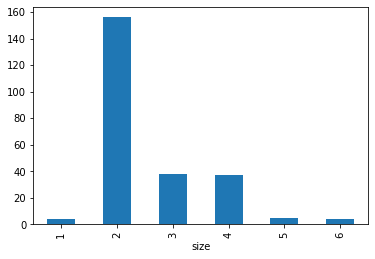

In [29]:
df.groupby("size")["total_bill"].describe()["count"].plot.bar()

In [30]:
df.groupby("time")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


In [31]:
df.groupby("time")["total_bill"].describe().reset_index()

,time,count,mean,std,min,25%,50%,75%,max
0,Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
1,Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


- Automate summary

In [32]:
cols = ["sex", "smoker", "day", "time", "size"]

for c in cols:
    print("-" * 60)
    temp_df = df.groupby(c)["total_bill"].describe()
    display(temp_df)

------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,20.744076,9.246469,7.25,14.00,18.35,24.71,50.81
Female,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.30


------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,20.756344,9.832154,3.07,13.420,17.92,26.860,50.81
No,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33


------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,7.242500,3.010729,3.07,6.2050,7.915,8.9525,10.07
2,156.0,16.448013,6.043729,5.75,12.4525,15.370,19.6900,40.55
3,38.0,23.277632,9.407065,10.33,16.9400,20.365,27.7750,50.81
4,37.0,28.613514,8.608603,16.49,21.5000,25.890,34.8100,48.33
5,5.0,30.068000,7.340396,20.69,28.1500,29.850,30.4600,41.19
6,4.0,34.830000,9.382000,27.05,29.1125,32.050,37.7675,48.17


## Examples with froup by (multiple columns)

In [33]:
# Mean bill by sex and time
# bỏ vô một list các cột
df.groupby(["sex", "time"])["total_bill"].mean()

sex     time  
Male    Lunch     18.048485
        Dinner    21.461452
Female  Lunch     16.339143
        Dinner    19.213077
Name: total_bill, dtype: float64

In [34]:
results = df.groupby(["sex", "time"])["total_bill"].mean()
results

sex     time  
Male    Lunch     18.048485
        Dinner    21.461452
Female  Lunch     16.339143
        Dinner    19.213077
Name: total_bill, dtype: float64

In [35]:
results[("Male", "Lunch")]

18.04848484848485

In [36]:
results.reset_index()

,sex,time,total_bill
0,Male,Lunch,18.048485
1,Male,Dinner,21.461452
2,Female,Lunch,16.339143
3,Female,Dinner,19.213077


Tương tự như group by 1 column, ta cũng có thể dùng `describe()`

In [37]:
df.groupby(["sex", "time"])["total_bill"].describe()

count       mean       std   min     25%    50%      75%    max
sex    time                                                                   
Male   Lunch    33.0  18.048485  7.953435  7.51  13.030  16.58  21.1600  41.19
       Dinner  124.0  21.461452  9.460974  7.25  14.705  19.63  25.6425  50.81
Female Lunch    35.0  16.339143  7.500803  8.35  12.065  13.42  17.8650  43.11
       Dinner   52.0  19.213077  8.202085  3.07  14.080  17.19  24.6925  44.30

In [38]:
df.groupby(["sex", "time"])["total_bill"].describe().reset_index()

,sex,time,count,mean,std,min,25%,50%,75%,max
0,Male,Lunch,33.0,18.048485,7.953435,7.51,13.030,16.58,21.1600,41.19
1,Male,Dinner,124.0,21.461452,9.460974,7.25,14.705,19.63,25.6425,50.81
2,Female,Lunch,35.0,16.339143,7.500803,8.35,12.065,13.42,17.8650,43.11
3,Female,Dinner,52.0,19.213077,8.202085,3.07,14.080,17.19,24.6925,44.30


# 3. Select columns based on condition 

In [39]:
# Reload data
df = pd.read_csv("data/ico.csv", encoding="unicode_escape")

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 3.1 Chọn cột dựa vào dtype
- Chọn những cột dtype là số (bool, in, float)

In [41]:
df.select_dtypes("number").head(2)

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0


In [42]:
df.select_dtypes("O").head()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


In [43]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [44]:
df.select_dtypes("O").describe()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### 3.2 Chọn cột dựa vào tên cột (partially matching)

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


- Lọc các cột bắt đầu bởi ký tự `C`

In [46]:
df.filter(regex = "^C").head(2)

,CustomerID,Country
0,17850.0,United Kingdom
1,17850.0,United Kingdom


- Lọc các cột kết thúc bởi ký tự `e`

In [47]:
df.filter(regex = "e$").head(2)

,StockCode,InvoiceDate,UnitPrice
0,85123A,12/1/2010 8:26,2.55
1,71053,12/1/2010 8:26,3.39


- Lọc các cột có chứa `Invoice`

In [48]:
df.filter(regex = "Invoice").head(2)

,InvoiceNo,InvoiceDate
0,536365,12/1/2010 8:26
1,536365,12/1/2010 8:26


## 4. Rename columns

In [49]:
df2 = df.iloc[:, :3].copy()

In [50]:
df2

,InvoiceNo,StockCode,Description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE


- Đổi tên cột `StockCode` thành `stock_code` và `InvoiceNo` thành `invoice_no` (cách 1)
- Cách này phù hợp cho sửa tên một số cột

In [51]:
df2.rename(\
    columns = {"StockCode" : "stock_code", "InvoiceNo" : "invoice_no"},\
    inplace=True
)
df2.head(2)

,invoice_no,stock_code,Description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN


- Đổi tên tất cả 3 cột thành `stock_code`, `invoice_no`, `desc`
- Cách này phù hợp khi đổi tên tất cả các cột (lưu ý giữ đúng thứ tự)

In [52]:
df2.columns = ["stock_code", "invoice_no", "desc"]
df2.head(1)

,stock_code,invoice_no,desc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER


- Ép cột `Quantity` thành string

In [53]:
df["Quantity"] = df["Quantity"].astype(str)
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity        object
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [54]:
df["Quantity"] = df["Quantity"].astype(float)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


## 5. Tạo biến categorical

In [55]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom


In [56]:
df["UnitPrice"].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

- Tạo một cột tên `GoodType` với 4 levels:
    - `Cheap`: các mặt hàng có `UnitPrice` nhỏ hơn `1`
    - `Regular`: các mặt hàng có `UnitPrice` trong khoảng `[1,10)`
    - `Luxury`: các mặt hàng có `UnitPrice` từ `10` trở lên  

### 5.1 Cách 1

In [57]:
def get_good_type(price):
    if price < 1:
        return ("Cheap")
    elif price < 10:
        return ("Regular")
    else:
        return ("Luxury")
    

In [58]:
get_good_type(5)

'Regular'

In [63]:
df["GoodType"] = df["UnitPrice"].apply(get_good_type)

In [65]:
# View Goodtype distribution
df["GoodType"].value_counts()

Regular    402201
Cheap      114670
Luxury      25038
Name: GoodType, dtype: int64

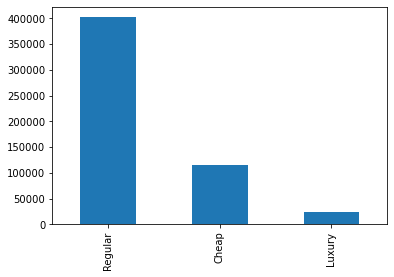

In [67]:
#Visualize (hoc sau)
df["GoodType"].value_counts().plot.bar()

plt.savefig("a.png", dpi=400)
plt.show()

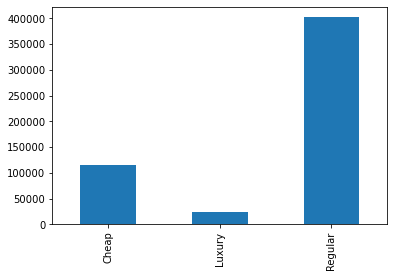

In [68]:
# Visualize (sort theo thứ tự)
df["GoodType"].value_counts().sort_index().plot.bar()
plt.show()

- Convert cột `GoodType` sang dạng categorical. Why?
    - Tiết kiệm bộ nhớ
    - Cho phép order các level của category

In [69]:
df["GoodType"] = pd.Categorical(df["GoodType"], categories= ["Cheap", "Regular", "Luxury"])


In [71]:
df["GoodType"].value_counts().sort_index()

Cheap      114670
Regular    402201
Luxury      25038
Name: GoodType, dtype: int64

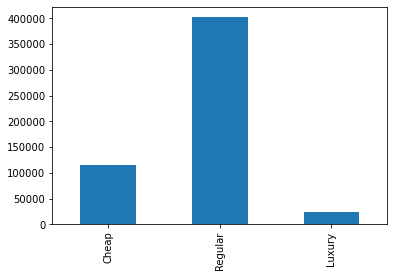

In [72]:
df["GoodType"].value_counts().sort_index().plot.bar()
plt.show()

## 5.2 Cách 2: dùng `pd.cut`

In [74]:
# Cut (auto labeling)
bins = [-np.infty, 1, 10, np.infty]
df["GoodType"] = pd.cut(df["UnitPrice"], bins = bins, right= False)

In [76]:
# Cut (auto labeling)
bins = [-np.infty, 1, 10, np.infty]
labels = ["Cheap", "Regular", "Luxury"]
df["GoodType"] = pd.cut(df["UnitPrice"], bins = bins, labels= labels, right= False)

In [77]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,Regular
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,Regular


In [78]:
pd.cut

<function pandas.core.reshape.tile.cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise', ordered: bool = True)>

## 6. Sắp xếp hàng

In [79]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,Regular


In [80]:
# Đổi cột Invoidate về dạng ngày tháng
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [83]:
# Sắp xếp các cột theo đơn giá từ thấp đến cao
df.sort_values("UnitPrice").head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
299984,A563187,B,Adjust bad debt,1.0,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,Cheap
299983,A563186,B,Adjust bad debt,1.0,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,Cheap
40984,539750,22652,TRAVEL SEWING KIT,1.0,2010-12-21 15:40:00,0.00,NaN,United Kingdom,Cheap


In [84]:
# Sắp xếp các cột theo đơn giá từ cao đến thấp
df.sort_values("UnitPrice",ascending=False).head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
222681,C556445,M,Manual,-1.0,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,Luxury
524602,C580605,AMAZONFEE,AMAZON FEE,-1.0,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,Luxury
43702,C540117,AMAZONFEE,AMAZON FEE,-1.0,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,Luxury


In [85]:
# Sắp xếp các cột theo ngày (nhỏ -> lớn) và sau đó theo đơn giá (nhỏ -> lớn)
df.sort_values(["InvoiceDate", "UnitPrice"]).head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Regular
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Regular


In [86]:
# Sắp xếp các cột theo ngày (nhỏ -> lớn) và sau đó theo đơn giá (nhỏ -> lớn)
df.sort_values(["InvoiceDate", "UnitPrice"],ascending=[True, False]).head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,Regular
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Regular


## 7. Lấy top N rows

In [88]:
# Top 5 dòng có unit price cao nhất
df.nlargest(5, "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
222681,C556445,M,Manual,-1.0,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,Luxury
524602,C580605,AMAZONFEE,AMAZON FEE,-1.0,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,Luxury
43702,C540117,AMAZONFEE,AMAZON FEE,-1.0,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,Luxury
43703,C540118,AMAZONFEE,AMAZON FEE,-1.0,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,Luxury
15016,C537630,AMAZONFEE,AMAZON FEE,-1.0,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,Luxury


In [89]:
# Top 5 dòng có UnitPrice thấp nhất
df.nsmallest(5, "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
299983,A563186,B,Adjust bad debt,1.0,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,Cheap
299984,A563187,B,Adjust bad debt,1.0,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,Cheap
622,536414,22139,NaN,56.0,2010-12-01 11:52:00,0.00,NaN,United Kingdom,Cheap
1970,536545,21134,NaN,1.0,2010-12-01 14:32:00,0.00,NaN,United Kingdom,Cheap
1971,536546,22145,NaN,1.0,2010-12-01 14:33:00,0.00,NaN,United Kingdom,Cheap
